# Product instance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import rayleigh, gilbrat, norm
import seaborn as sns
import random
import time
from datetime import timedelta, date

In [2]:
products = pd.read_csv('products.csv').set_index('id')
products.head()

,name,category,type,recurrent,cost_for_call,cost_for_sms,cost_for_data,allowance_sms,allowance_voice,allowance_data,duration,cumulative_charge
id,,,,,,,,,,,,
0,30,prepaid,tariff,True,0.55,0.25,0.002,0,200,1.000000e+09,30,34.50
1,share,prepaid,tariff,True,0.55,0.25,0.002,0,9223372036854775807,1.000000e+10,30,126.50
2,star,prepaid,tariff,True,0.55,0.25,0.002,0,9223372036854775807,1.000000e+11,30,253.00
3,unlimited_data_month,prepaid,tariff,False,0.00,0.00,0.000,0,0,1.000000e+13,30,391.00
4,unlimited_data_3months,prepaid,tariff,False,0.00,0.00,0.000,0,0,1.000000e+13,90,1121.25


In [3]:
customers = pd.read_csv('../Customer/Customers.csv').set_index('Customer_ID')
customers.head()

,Unnamed: 0,Gender,First name,Last name,Date_of_birth,Agree_for_promo,autoplay_card,Customer_Email,MSISDN,Status,Region,Language,Category,termination_date
Customer_ID,,,,,,,,,,,,,,
10,0,Female,Maha,Salman,2021-11-26,No,No,MahaSalman71@aramco.com.sa,+996-55-6660536,Inactive,Mecca,Arabic,Business,NaN
19,1,Male,Rabih,Jahid,2021-05-17,No,Yes,RabihJahid7@naseej.com.sa,+996-53-8148968,Inactive,Mecca,Arabic,Business,NaN
7,2,Male,Aminullah,Ghafour,1981-07-23,No,Yes,AminullahGhafour1@compuserve.com,+996-50-5552362,Inactive,Mecca,Arabic,Business,NaN
12,3,Female,Khairunnisa,Rushdi,1978-07-31,Yes,No,KhairunnisaRushdi66@sahara.com.sa,+996-55-7519735,Inactive,Asir,Arabic,Business,NaN
2,4,Male,Samir,Manqabadi,1999-01-01,No,Yes,SamirManqabadi89@sahara.com.sa,+996-55-7844883,Active,Jizan,Arabic,Business,NaN


In [4]:
# https://worldpopulationreview.com/countries/saudi-arabia-population
population = 35678883
female_percent = 42.6
male_percent = 57.4
# government stats https://www.stats.gov.sa/en/5305
below_20_total = (2674932 + 2771032 + 2428319 + 2216050) / 31787580
below_20_saudis_only = (2137185 + 2088919 + 1869325 + 1761027) / 20081582

# https://www.gsma.com/publicpolicy/wp-content/uploads/2012/03/GSMA_ChildrensMobilePhones2013WEB.pdf
children_with_smartphones = 70.5
children_with_phones = 87.0
children_used_phone_once = 6.7

# https://www.itu.int/en/ITU-D/Regional-Presence/ArabStates/Documents/events/2018/Women/GSMA%20Connected%20Women%20Gender%20Gap%20Report%202018%20-%20Oliver%20Rowntree.pdf
gender_gap_facebook = 70.0
# https://www.mckinsey.com/~/media/mckinsey/industries/technology%20media%20and%20telecommunications/telecommunications/our%20insights/winning%20the%20rush%20for%20data%20services%20in%20the%20middle%20east%20and%20africa/telecommunications%20industry%20at%20cliffs%20edge%20time%20for%20bold%20decisions_june2016.pdf
# Saudi Arabia has world’s highest rate of YouTube subscribers

In [5]:
# https://datareportal.com/reports/digital-2021-saudi-arabia
connections_per_user = 1.127
total_connections = connections_per_user * population

# Gender gap calculation: https://www.gsma.com/mobilefordevelopment/wp-content/uploads/2018/04/GSMA_The_Mobile_Gender_Gap_Report_2018_32pp_WEBv7.pdf
mt = (population * male_percent / 100)
ft = (population * female_percent / 100)


mu = population / (1 + 0.76 * ft / mt)
fu = 0.76 * ft * mu / mt

female_connections = fu
male_connections = total_connections - female_connections
male_connections_percent = male_connections / total_connections
female_connections_percent = female_connections / total_connections

# https://theinclusiveinternet.eiu.com/explore/countries/SA/performance/indicators/affordability/competitive-environment/average-revenue-per-user-arpu-annualized
annual_ARPU_in_dollars = 332
saudi_riyal_to_dollars = 0.27
# monthly expenditure
mean_national_expenditure = annual_ARPU_in_dollars / 12 / saudi_riyal_to_dollars

customers_number = customers.count()[0]
# customers_number = 10000
sample_connections = customers_number * connections_per_user
male_size = int(sample_connections * male_connections_percent)
female_size = int(sample_connections * female_connections_percent)

# This value help the histogram look like th
std = mean_national_expenditure * 0.572


# the distribution of household expenditure for mobile phones: https://slideplayer.com/slide/17640605/
# 50, 70, 1.3, 2 – coefficients that worked well so that the histogram looks similar to the known histogram and the mean is about the same as the known mean value
# For more diverse range values, most primary belonging to men as they have many more jobs and much more income
male_coef = int(customers_number * 0.1)

male_expenditures = rayleigh.rvs(loc=mean_national_expenditure-50, scale=std/1.3, size=male_size - male_coef)
female_expenditures = rayleigh.rvs(loc=mean_national_expenditure-70, scale=std/2, size=female_size)
third_part_1 = np.random.uniform(size=int(0.45 * male_coef), low=34.5, high=650)
third_part_2 = np.random.uniform(size=int(0.05 * male_coef), low=650, high=1200)
fourth_part = norm.rvs(size=int(0.5 * male_coef), loc=mean_national_expenditure-60, scale=15)
male_expenditures = np.concatenate([male_expenditures, third_part_1, third_part_2, fourth_part])

male_expenditures[male_expenditures < 34.5] = 34.5
female_expenditures[female_expenditures < 34.5] = 34.5
total_expenditure = np.concatenate([male_expenditures, female_expenditures])
np.random.shuffle(total_expenditure)

In [196]:
# A quick check with the known mean
print(mean_national_expenditure)
print(np.mean(total_expenditure))
print(len(total_expenditure))
print(male_size, female_size, male_size + female_size)
print(male_connections_percent + female_connections_percent)

102.46913580246914
106.33401167808411
11269
7663 3606 11269
1.0


Freedman–Diaconis number of bins: 257


(array([279., 221., 273., 341., 396., 493., 522., 574., 597., 571., 524.,
        578., 569., 528., 497., 435., 443., 374., 350., 333., 285., 274.,
        244., 181., 176., 163., 130., 103.,  85.,  72.,  58.,  42.,  44.,
         27.,  33.,  20.,  13.,  11.,  13.,   8.,   4.,   3.,   9.,   8.,
          2.,   3.,   5.,   1.,   4.,   0.,   4.,   3.,   8.,   6.,   5.,
          2.,   3.,   5.,   7.,   3.,   8.,   3.,   4.,   1.,   6.,   3.,
          0.,   4.,   4.,   3.,   4.,   3.,   5.,   6.,   3.,   3.,   1.,
          3.,   2.,   2.,   3.,   3.,   3.,   3.,   3.,   3.,   4.,   1.,
          2.,   2.,   0.,   2.,   4.,   3.,   3.,   3.,   8.,   4.,   3.,
          3.,   6.,   1.,   3.,   1.,   6.,   2.,   2.,   4.,   2.,   3.,
          2.,   4.,   2.,   6.,   4.,   4.,   6.,   6.,   8.,   5.,   1.,
          2.,   6.,   5.,   3.,   4.,   3.,   2.,   1.,   0.,   1.,   0.,
          7.,   5.,   2.,   4.,   2.,   1.,   0.,   0.,   0.,   0.,   1.,
          2.,   0.,   1.,   0.,   0., 

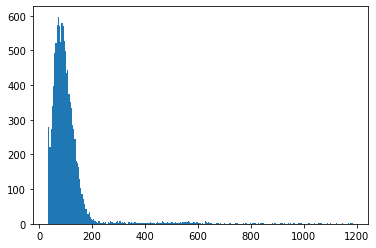

In [197]:
# calculate the number of bins
q25, q75 = np.percentile(total_expenditure, [25, 75])
bin_width = 2 * (q75 - q25) * len(total_expenditure) ** (-1/3)
bins = round((total_expenditure.max() - total_expenditure.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)

# plot
plt.hist(total_expenditure, bins=bins)

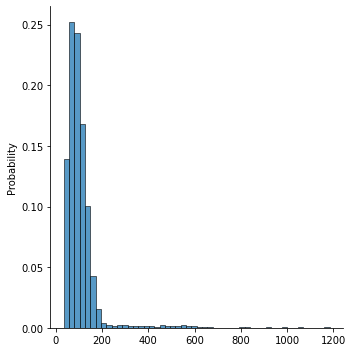

In [198]:
# probability plot
sns.displot(total_expenditure[total_expenditure <= 1200], stat='probability', bins=50)

In [6]:
# The start of DataFrame creation
ids = np.arange(len(total_expenditure))
gender = np.hstack((np.array(['male'] * male_size), np.array(['female'] * female_size)))
expenditures = np.hstack((male_expenditures, female_expenditures))
tariff = np.array([-1] * len(total_expenditure))

print(len(gender), len(expenditures))
table = pd.DataFrame({'id': ids, 'gender': gender, 'expenditure': expenditures, 'tariff_id': tariff})
table.head()

11269 11269


,id,gender,expenditure,tariff_id
0,0,male,85.620248,-1
1,1,male,79.658432,-1
2,2,male,123.430219,-1
3,3,male,91.989466,-1
4,4,male,78.546214,-1


In [7]:
# Data-only sims assignment
# https://www.refworld.org/pdfid/502a0c51a.pdf
data_only_subscriptions = 7.8 * 10 ** 6
data_only_subscriptions_percent = data_only_subscriptions / total_connections
data_only_in_dataset = int(len(total_expenditure) * data_only_subscriptions_percent)

# Generate frequency of different data-only plans by gilbrat distribution
s = gilbrat.rvs(loc=mean_national_expenditure-50, scale=60, size=data_only_in_dataset)
s_len = len(s)


data_ids = [5, 7, 6, 8, 3, 4]
data_only_prices = [148, 171, 201, 230, 391, 1121]


lengths = []
lengths.append(len(s[s < data_only_prices[0]]))
for i in range(len(data_only_prices) - 1):
    lengths.append(len(s[(s >= data_only_prices[i]) & (s < data_only_prices[i + 1])]))
lengths.append(len(s[s >= data_only_prices[-1]]))
print(lengths)

# Finally, assignment
table=table.sort_values(by=['expenditure']).reset_index(drop=True)
table.iloc[-lengths[-1]:, 3] = data_ids[-1]
table.iloc[-lengths[-1]:, 2] = data_only_prices[-1]

for data_id, data_price, length in (list(zip(data_ids, data_only_prices, lengths))[-2::-1]):
    # print(data_id, data_price, length)
    # df = \
    condition_1 = table['expenditure'] <= data_price
    ind = table[table['expenditure'] <= data_price].index[-1]
    condition_2 = table.index <= ind
    cond_3 = ind - length < table.index
    table.iloc[(condition_1 & condition_2 & cond_3).values, 3] = data_id
    table.iloc[(condition_1 & condition_2 & cond_3).values, 2] = data_price
    # print(df.count())
    # print(id(df))
print(id(table))
    # table.loc[((table.expenditure <= data_price) & (table.index )), 'tariff_id'] = data_id
    # table.loc[(table.expenditure <= data_price), 'expenditure'] = data_price

# for i in range(table.shape[0] - 1, -1, -1):
#     table

table.tail(100)

[1485, 147, 152, 96, 205, 90, 10]
140229284661136


,id,gender,expenditure,tariff_id
11169,6908,male,585.471923,-1
11170,6927,male,589.859551,-1
11171,6959,male,590.306251,-1
11172,6696,male,591.761251,-1
11173,6902,male,591.836426,-1
...,...,...,...,...
11264,7127,male,1121.000000,4
11265,7120,male,1121.000000,4
11266,7133,male,1121.000000,4
11267,7142,male,1121.000000,4


In [201]:
print(table[table.tariff_id != -1].count())
print(data_only_in_dataset)
print(table.count())

id             2102
gender         2102
expenditure    2102
tariff_id      2102
dtype: int64
2185
id             11269
gender         11269
expenditure    11269
tariff_id      11269
dtype: int64


In [8]:
# Prepaid/postpaid tariffs assignment
# Frequences according to the graph
prepaid_subscriptions_f = 0.75
postpaid_subscriptions_f = 0.25

# https://data.worldbank.org/indicator/SL.TLF.TOTL.FE.ZS?locations=SA
# male_labor_force = 0.79124
# female_labor_force = 0.20876

# Since there is no way to know the rate of postpaid among genders/age groups, etc, the postpaid are given out randomly
# indexes are chosen arbitrarily
df = table[(table['expenditure'] >= 80.5) & (table['tariff_id'] == -1)]
postpaid_num_1 = random.sample(list(df.index), int(df.count()[0] * postpaid_subscriptions_f * 0.95))
table.iloc[[postpaid_num_1], 3] = 24

df2 = table[(table['expenditure'] >= 571.5) & (table['tariff_id'] == -1)]
postpaid_num_2 = random.sample(list(df2.index), int(df.count()[0] * postpaid_subscriptions_f * 0.05))
table.iloc[[postpaid_num_2], 3] = 25

# df3 = table[(table['expenditure'] >= 253.0) & (table['tariff_id'] == -1)]

table.iloc[((table['expenditure'] >= 126.5) & (table['tariff_id'] == -1)).values, 3] = 1
table.iloc[((table['expenditure'] >= 253.0) & (table['tariff_id'] == -1)).values, 3] = 2
table.iloc[(table['tariff_id'] == -1).values, 3] = 0
print(table[table.tariff_id == -1].count())

id             0
gender         0
expenditure    0
tariff_id      0
dtype: int64


In [9]:
# PRODUCT INSTANCE CREATION
# customers_0 = customers.copy()
# for i in range(199):
#     customers_0 = pd.concat([customers_0, customers.copy()], axis=0)


customers_2 = customers.sort_values(by=['Gender', 'Category']).reset_index(drop=True)
table_2 = table.sort_values(by=['gender', 'expenditure'], ascending=[True, False]).reset_index(drop=True)

product_instances_1 = pd.DataFrame({
    'customer_id': customers_2['Unnamed: 0'],
    'product_id': table_2.iloc[:customers_2.count()[0], 3],
    'expenditure': table_2.iloc[:customers_2.count()[0], 2]
})
# using males from the end
start_index = table_2.count()[0] - customers_2.count()[0]
product_instances_2 = pd.DataFrame({
    'customer_id': customers_2.iloc[-start_index:, 0],
    'product_id': table_2.iloc[customers_2.count()[0]:, 3],
    'expenditure': table_2.iloc[customers_2.count()[0]:, 2]
})
product_instances = pd.concat([product_instances_1, product_instances_2], axis=0)

def str_time_prop(start, end, time_format, prop):
    stime = time.mktime(time.strptime(start, time_format))
    etime = time.mktime(time.strptime(end, time_format))
    ptime = stime + prop * (etime - stime)
    return time.strftime(time_format, time.localtime(ptime))

def random_date(start, end, prop):
    return str_time_prop(start, end, '%Y-%m-%d', prop)

dates = []
for _ in range(product_instances.count()[0]):
    dates.append(random_date("2022-02-01", "2022-02-28", random.random()))
product_instances['activation_date'] = pd.Series(dates)


# Termination date
product_instances['termination_date'] = np.nan
not_recurrent = products[(products['recurrent'] == False) & (products['duration'] == 30)]
product_instances.iloc[product_instances['product_id'].isin(not_recurrent.index).values, 4] = pd.to_datetime(product_instances.iloc[product_instances['product_id'].isin(not_recurrent.index).values, 3]) + pd.DateOffset(days=30)

not_recurrent = products[(products['recurrent'] == False) & (products['duration'] == 90)]
product_instances.iloc[product_instances['product_id'].isin(not_recurrent.index).values, 4] = pd.to_datetime(product_instances.iloc[product_instances['product_id'].isin(not_recurrent.index).values, 3]) + pd.DateOffset(days=90)

recurrent = products[(products['recurrent'] == True)]
days_to_add = np.random.randint(90, 300, product_instances.loc[(product_instances['product_id'].isin(recurrent.index).values), 'activation_date'].count())
days_to_add = np.array(pd.Series(days_to_add).apply(lambda d: pd.DateOffset(days=d)))
product_instances.iloc[product_instances['product_id'].isin(recurrent.index).values, 4] = pd.to_datetime(product_instances.loc[product_instances['product_id'].isin(recurrent.index), 'activation_date']) + days_to_add

# Online sales of telecom services account for only one-fifth of all sales. Source: https://www.kearney.com/communications-media-technology/article/?/a/the-telecom-consumer-of-the-future
product_instances['distribution_channel'] = np.random.choice(['physical_store', 'online'], size=product_instances.count().max(), p=[0.8, 0.2])
product_instances['status'] = 'active'

product_instances.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arrays/datetimelike.py:1187: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  warnings.warn(


,customer_id,product_id,expenditure,activation_date,termination_date,distribution_channel,status
0,0.0,5.0,148.0,2022-02-25,2022-03-27 00:00:00,physical_store,active
1,3.0,5.0,148.0,2022-02-20,2022-03-22 00:00:00,online,active
2,5.0,5.0,148.0,2022-02-11,2022-03-13 00:00:00,physical_store,active
3,6.0,5.0,148.0,2022-02-24,2022-03-26 00:00:00,physical_store,active
4,9.0,5.0,148.0,2022-02-18,2022-03-20 00:00:00,physical_store,active


In [11]:
# Costed events
# events = pd.DataFrame({
#     'business_product_instance_id',
#     'cost',
#     'duration',
#     'number_of_sms',
#     'total_volume',
#     'event_type',
# })

df1 = product_instances[product_instances['product_id'].isin([range(3,9)])]
events1 = pd.DataFrame({
    'business_product_instance_id': df1['product_id'],
    'cost': 0,
    'duration': 0,
    'number_of_sms': 0,
    'total_volume': np.random.randint(1, 10, df1.count()[0]) * 10e6,
    'event_type': 'data',
})

df2 = product_instances[product_instances['product_id'].isin([range(3)])]
events2_1 = pd.DataFrame({
    'business_product_instance_id': df2['product_id'],
    'cost': 0,
    'duration': np.random.randint(1, 100, df2.count()[0]),
    'number_of_sms': 0,
    'total_volume': 0,
    'event_type': 'call',
})

events2_2 = pd.DataFrame({
    'business_product_instance_id': df2['product_id'],
    'cost': 0,
    'duration': 0,
    'number_of_sms': 0,
    'total_volume': np.random.randint(1, 10, df2.count()[0]) * 10e4,
    'event_type': 'data',
})

df2_1 = df2[df2['product_id'] == 0]
events2_3 = pd.DataFrame({
    'business_product_instance_id': df2_1['product_id'],
    'cost': df2_1['expenditure'] - 34.5,
    'duration': 0,
    'number_of_sms': (df2_1['expenditure'] - 34.5) // 0.25,
    'total_volume': 0,
    'event_type': 'sms',
})

df2_2 = df2[df2['product_id'] == 1]
events2_4 = pd.DataFrame({
    'business_product_instance_id': df2_2['product_id'],
    'cost': df2_2['expenditure'] - 126.5,
    'duration': 0,
    'number_of_sms': (df2_2['expenditure'] - 126.5) // 0.25,
    'total_volume': 0,
    'event_type': 'sms',
})

df2_3 = df2[df2['product_id'] == 2]
events2_5 = pd.DataFrame({
    'business_product_instance_id': df2_3['product_id'],
    'cost': df2_3['expenditure'] - 253.0,
    'duration': 0,
    'number_of_sms': (df2_3['expenditure'] - 253.0) // 0.25,
    'total_volume': 0,
    'event_type': 'sms',
})

df3 = product_instances[product_instances['product_id'].isin([24, 25])]
events3_1 = pd.DataFrame({
    'business_product_instance_id': df3['product_id'],
    'cost': 0,
    'duration': np.random.randint(1, 100, df3.count()[0]),
    'number_of_sms': 0,
    'total_volume': 0,
    'event_type': 'call',
})

events3_2 = pd.DataFrame({
    'business_product_instance_id': df3['product_id'],
    'cost': 0,
    'duration': 0,
    'number_of_sms': 0,
    'total_volume': np.random.randint(1, 10, df3.count()[0]) * 10e4,
    'event_type': 'data',
})

df3_1 = df3[df3['product_id'] == 24]
events3_3 = pd.DataFrame({
    'business_product_instance_id': df3_1['product_id'],
    'cost': df3_1['expenditure'] - 80.5,
    'duration': 0,
    'number_of_sms': (df3_1['expenditure'] - 80.5) // 0.285,
    'total_volume': 0,
    'event_type': 'sms',
})

df3_2 = df3[df3['product_id'] == 25]
events3_4 = pd.DataFrame({
    'business_product_instance_id': df3_2['product_id'],
    'cost': df3_2['expenditure'] - 517.5,
    'duration': 0,
    'number_of_sms': (df3_2['expenditure'] - 517.5) // 0.285,
    'total_volume': 0,
    'event_type': 'sms',
})


events = pd.concat([value for key, value in globals().items() if key.startswith('event')], axis=0)
# events.pop(0)
# print(events.head())

events['event_id'] = np.arange(len(events))
dates = []
for _ in range(events.count()[0]):
    dates.append(random_date("2022-03-01", "2022-03-31", random.random()))
events['date'] = pd.Series(dates)

events['direction'] = 'outcoming'
events['roaming'] = np.random.choice([True, False], size=events.count()[0], p=[0.1 ,0.9])
events['calling_msisdn'] = -1
events['called_msisdn'] = -1
events.head()

,business_product_instance_id,cost,duration,number_of_sms,total_volume,event_type,event_id,date,direction,calling_msisdn,called_msisdn,roaming
34,24.0,0.0,60,0.0,0.0,call,0,2022-03-06,outcoming,-1,-1,False
35,24.0,0.0,73,0.0,0.0,call,1,2022-03-24,outcoming,-1,-1,False
38,24.0,0.0,52,0.0,0.0,call,2,2022-03-11,outcoming,-1,-1,False
40,24.0,0.0,89,0.0,0.0,call,3,2022-03-16,outcoming,-1,-1,False
48,24.0,0.0,41,0.0,0.0,call,4,2022-03-03,outcoming,-1,-1,False


In [12]:
product_instances.pop('expenditure')

0        148.0
1        148.0
2        148.0
3        148.0
4        148.0
         ...  
11264     34.5
11265     34.5
11266     34.5
11267     34.5
11268     34.5
Name: expenditure, Length: 12538, dtype: float64

In [ ]:
product_instances.to_csv('business_product_instances.csv')
events.to_csv('costed_events.csv')